---
## First, we need to "mount" the notebook onto our google drive
  #### To do so, just run the cell below:

> Take care the change the path of the WORK_AREA as it depends on where you put this notebook and subsequent files




---


In [ ]:
import os
from google.colab import drive

WORK_DRIVE = '/gdrive'
# You may need to change this path, it depends on where you put the notebook and files
WORK_AREA = WORK_DRIVE + '/MyDrive/Colab Notebooks/EAP2025'

drive.mount(WORK_DRIVE)
os.chdir(WORK_AREA)

Mounted at /gdrive


---
## Now we should get all the libraries and musical definitions by running the cells below:






---


In [ ]:
!pip install midiutil

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 19.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for midiutil: filename=MIDIUtil-1.2.1-py3-none-any.whl size=54569 sha256=43997792ebe86391224a346c248326620511f8162d19b12f65ac0d89ca5dd2ff
  Stored in directory: /root/.cache/pip/wheels/6c/42/75/fce10c67f06fe627fad8acd1fd3a004a24e07b0f077761fbbd
Successfully built midiutil


In [ ]:
# This file contains all the definitions for the widgets and some constant variables that I had set
from music_def import *

---
## First, let's load your data and see how it looks


> For the example, we will use the C60 spectrum


> Loading file called "C60plus.csv" and saving the values in the first column as a list called "data", then visualise by plotting it




---


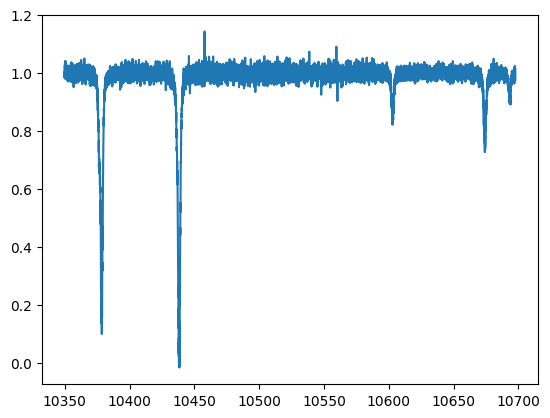

In [ ]:
# Loading Data
file = np.loadtxt('C60plus.csv',skiprows=1, delimiter=',')
data = file[:,1]

# plotting
plt.plot(file[:,0],file[:,1])

### Do you want to take a closer look at the noise?
#### If so, then unhash the 2nd and 3rd line below to manually change the range

You have manually defined the lower Y bound
You have manually defined the upper Y bound

 Data to bin will look like this:


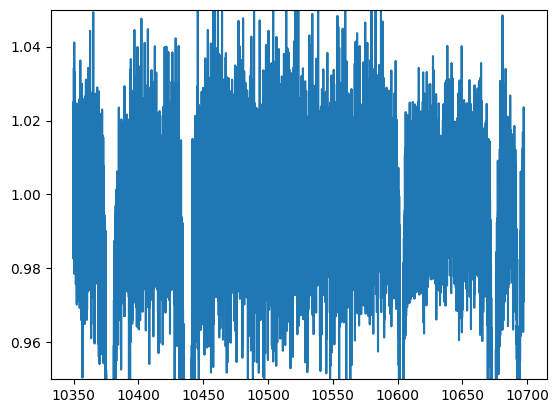

If this is not what you want then you must edit the range and run the cell above again!


In [ ]:
# If so then change the maximum and minimum limit of the y-axis
# low = 0.95
# high = 1.05

# If nothing is included above then it will automatically take the max and min of the data as the range
try:
    low
except NameError:
    print("Automatically setting min of y as the lower bound")
    low = np.min(data)
else:
    print("You have manually defined the lower Y bound")

try:
    high
except NameError:
    print("Automatically setting max of y as the upper bound")
    high = np.amax(data)
else:
    print("You have manually defined the upper Y bound")


print("\n Data to bin will look like this:")

# Plotting with the zoom
plt.plot(file[:,0],file[:,1])
plt.ylim(low , high)
plt.show()

print("If this is not what you want then you must edit the range and run the cell above again!")

---
## Now some input from user required below:


> Most significant choice is whether you want a melody in major, natural minor, or harmonic minor



> Also to give your track a name so you do not overwrite it by accident!




---

In [ ]:
# Run this cell to get the widgets to show
display(vert_scale)

## Choose a name for your MIDI track
display(vert_name)

---
## Before the magic happens, please note that by default:


> Duration of notes = 1

> Tempo = 120

> Time signature = 4/4

> Resulting melody length = 32 notes = 8 seconds long

If you are happy with your choices and the above selection, go ahead and run the next cell!


### To change any of the defaults please feel free to come chat with us!





---

In [ ]:
note_index = notes_to_index[def_note.value]
scale_num = scale_index[def_scale.value]
scale_clean = all_scales[scale_num]

scale = []
for ix in scale_clean:
    a = ix + (len_oct*def_octave.value) + note_index
    scale.append(a)

bins = np.linspace(low ,high,len(scale)) # Defining bins based of the max, min, and length of a scale
abs_binned = np.digitize(data,bins) # sorting the data into the bins defined above
unique_bins = np.unique(abs_binned) # making an array of our unique bins

revalue = dict(zip(unique_bins, scale)) # dictionary to map our scale to the binned values of our IR absorption
notes = [revalue.get(n, n) for n in abs_binned] # mapping the data values onto the scale

#
channel  = int(def_channel.value)
tempo    = int(def_tempo.value)
volume   = int(def_volume.value)
duration = 1

# Writing a MIDI file based on your choices

MyMIDI = MIDIFile(1)  # One track, defaults to format 1 (tempo track is created
                      # automatically)
MyMIDI.addTempo(track, time, tempo)
MyMIDI.addTimeSignature(track, time, def_bpb.value , note_name_dictionary[def_type_beat.value], clocks_per_tick, notes_per_quarter )   #add a time signature, here just 4/4

# loop over each time step

intervals = int(len(notes)/16)

i=0
for n in notes[::intervals]:  #loop over each note
    MyMIDI.addNote(track, channel, n, time+i, duration, volume)
    i=i+1

# saving the resulting midi file.

with open(str(def_name.value)+".mid", "wb") as output_file:
    MyMIDI.writeFile(output_file)

del low, high

### If you want another track, then go back to the 3rd coding cell and run everything agian, remembering to change the name of your track if you dont want to overwrite your MIDI file

---
